# 2. Basic Statistics

In [1]:
using PyPlot
using Distributions
using SpecialFunctions
using Statistics
using LaTeXStrings

2.1 Multivariate distributions   
2.2 Sums of random numbers   
2.3 Sample statistics  
2.4 Distribution of variance  
2.5 Summary and additional questions

## 2.1 Multivariate Distributions


2.1.1 Multivariate characteristic functions   
2.1.2 Multinoulli or categorical distribution   
2.1.3 Multinomial distribution  
2.1.4 Multivariate Gaussian distribution  

### 2.1.1 Multivariate Characteristic Functions   




* Consider distributions $f(\vec{x})$ of multiple variables $\{x_1,x_2,x_3...\}$.  


* The variables are generally correlated so that the covariance is non-zero $\langle x_i x_j \rangle\neq0$.


* Characteristic function definition straightforwardly extended 
    $$\hspace{8mm}\phi_{\vec{x}}(\vec{t})=\langle e^{i\vec{t}^T\vec{x}} \rangle$$

### 2.1.2 Multinoulli or Categorical Distribution   



* The Bernoulli distribution is used to model the outcome of a binary event, like flipping a coin once. 


* Bernoulli distribution is parameterised by $p_1$ and $p_2$ with constraint $p_1+p_2=1$.   


* We can generalise this to $K$ possible outcomes or categories parameterised by $(p_1,~p_2\cdots p_K)$ with $\sum_{k=1}^Kp_k=1$


* Encoding the result in a vector, like $(1,0,0)$, $(0,1,0)$ or $(0,0,1)$ for an example where $K=3$, is called **one-hot encoding**.   



### 2.1.3 Multinomial Distribution   



* A sum of independent binary Bernoulli events results in the binomial distribution.   


* Analagously, a sum of multinoulli events results in a multinomial distribution. 


* A multinomial distribution is what you get by throwing a $K$-sided die $n$ times with a result $(x_1,x_2,\cdots x_K)$ where $\sum_{j}x_j=n$.   


* The combinatorial factor is the same as you would get from expanding $(p_1+p_2+\cdots p_K)^n$.  

$$\hspace{8mm}Mu(\vec{x}|n,\vec{p})={{n}\choose{x_1\cdots x_K}}\prod_{j=1}^K p_j^{x_j}$$

* A multinoulli distribution is the case where $n=1$.   

## 2.1.4 Multivariate Gaussian distribution   

* Distribution for multiple gaussian variables that allows for correlations.     


* For $n$ Gaussian variables, where $\vec{\mu}$ is the vector of means and $\Sigma_{ij}=$Covar$(x_i,x_j)$ is the covariance matrix, the distribution is      

$\hspace{8mm}P(\vec{x})=\frac{1}{(2\pi)^{n/2}}\frac{1}{\sqrt{|\Sigma|}}\exp(-\frac{(\vec{x}-\vec{\mu})^T \Sigma^{-1}(\vec{x}-\vec{\mu})}{2})$


* The characteristic function for the multivariate Gaussian is  

$\hspace{8mm}\phi_{\vec{x}}(\vec{t})=\exp\left(i\vec{\mu}^T \vec{t} - \frac{1}{2}\vec{t}^T\Sigma\vec{t}\right)$


## 2.2 Sums of Random Numbers


2.2.1 Functions of random numbers  
2.2.2 Law of large numbers  
2.2.3 Central limit theorem  
2.2.4 Examples of the central-limit theorem

### 2.2.1 Functions of Random Numbers



* Consider repeated samples from the same distribution $X_1$, $X_2$, $\cdots, X_n$.


* A statistic is some function of these measurements. A commonly used statistic is the sample mean  

$\hspace{0.8cm}$ $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$

* This is a random number with some distribution, for repeated draws.


* What are the convergence properties of this quantity when there are many samples taken?

## 2.2.2 Law of large numbers

* The sample mean is a $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$.

* Law of large numbers states that 

$\hspace{0.8cm}$ $\overline{X}_n\to\mu$  

* The characteristic function of a random variable is $\phi_X(t)=\langle e^{itX} \rangle$

* Reminder: for the sum $X=X_1+X_2$ the characteristic functions are $\phi_X(t)=\phi_{X_1}(t)\phi_{X_2}(t)$

* As these are indpendent samples we have

$\hspace{0.8cm}$ $\phi_\overline{X}(t)=\langle e^{itX/n}\rangle^n=[\phi_X(t/n)]^n=[1+\frac{it}{n}\langle X \rangle + O(1/n^2)]^n=e^{it\langle X \rangle+O(1/n)}$

* But $e^{it\mu}$ is the characteristic function of a sharply-peaked distribution (Dirac Delta) around $\mu$. 

## 2.2.3 Central limit theorem and standard error on the mean

* Go beyond the first order in the $t$ expansion of the characteristic function of $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$

$\hspace{0.8cm}$ $\phi_\overline{X}(t)=\langle e^{itX/n}\rangle^n=[\phi_X(t/n)]^n=[1+\frac{it}{n}\langle X \rangle - \frac{t^2}{2n^2}\langle X^2 \rangle+\cdots]^n\simeq e^{[?]}$

* **<font color='red'>Question:</font>** Calculate the argument of the exponential to order $1/n$.   
Compare it to the list of characteristic functions is 1.4.3. Infer the distribution and give its mean and variance.


## 2.2.4 <font color='red'>Question:</font> Examples of the central limit theorem

Consider two gamma distributions $(\alpha,\beta)$ with shape factors $(0.5,0.5)$ and $(5.0,5.0)$.


* What are their means?


* Plot the pdfs for these two cases.


* Consider a sample size $n$ for calculating the sample mean.   
Plot the histogram of sample means for these two cases for $N$ repeated experiments, one graph for each gamma case.


* Plot the normal distributions corresponding to the central limit theorem on the same graphs.

Let $X \sim Gamma(0.5,0.5)$ and $Y \sim Gamma(5.0,5.0)$. Then by $\mathbb{E}[Gamma(\alpha, \beta)] = \frac{\alpha}{\beta}$, we know $\mathbb{E}[X] = \mathbb{E}[Y] = 1$.

In [2]:
x = 0.01:0.01:20

function gamma_pdf(x, α, β)
    result = 1/gamma(α) * β^α * x.^(α-1) .* exp.(-β*x)
    return result
end

gamma_pdf (generic function with 1 method)

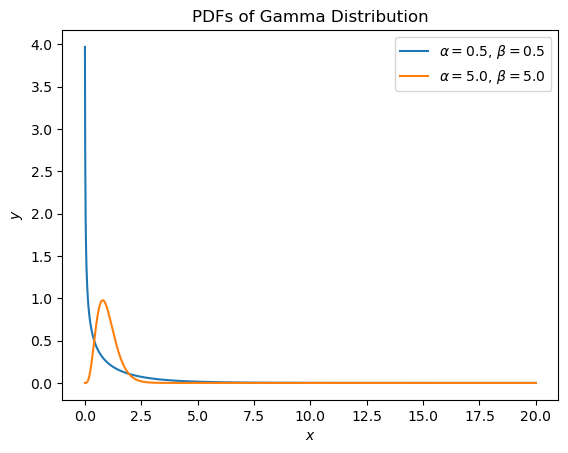

In [10]:
X = gamma_pdf(x, 0.5, 0.5)
Y = gamma_pdf(x, 5.0, 5.0)

plt.plot(x, X, label=L"\alpha=0.5,\, \beta=0.5")
plt.plot(x, Y, label=L"\alpha=5.0,\, \beta=5.0")
plt.xlabel(L"x")
plt.ylabel(L"y")
plt.legend()
plt.title("PDFs of Gamma Distribution")

plt.show()


One method for numerical sampling is called the **Grid** method.

Let $X \sim f_X(x)$ and $\mathcal{S}_X$ denote its support. To generate $X$, we first select an appropriate grid of $\{x_i\}_{i=1}^d$, that cover the support $\mathcal{S}_X$, and then approximate the pdf $f_X(x)$ by a discrete density at $\{x_i\}_{i = 1}^d$ with probabilities 
$$
p_i = \frac{f_X(x_i)}{\sum_{j=1}^d f_X(x_j)}, \, i = 1,\cdots, d.
$$

But Julia provides the sampling function for gamma distribution in ```Distributions.jl```.

In [11]:
@show rand(Gamma(0.5, 2), 1) # generate one random sample from gamma distribution

rand(Gamma(0.5, 2), 1) = [0.04187310189254784]


1-element Array{Float64,1}:
 0.04187310189254784

In [ ]:
samples_X = rand(Gamma(0.5, 1/0.5), 50, 10000)
means_X = mean(samples_X, dims=2)
normal1 = Normal(0.5/0.5, 0.5/(0.5^2))

plt.hist(means_X)
plot!(x, pdf.(normal1, x))

In [ ]:
samples_Y = rand(Gamma(0.5, 1/0.5), 1000, 10000)
means_Y = mean(samples_Y, dims=2)
histogram(means_Y, bins=LinRange(0.95,1.05,21), label=L"\mathbb{E}[X]")

# 2.3 Sample statistics

2.3.1 Sample mean  
2.3.2 Sample variance  
2.3.3 Sample variance derivation  
2.3.4 Numerical test

## 2.3.1 Sample mean

* The sample mean tends towards the true mean as $n\to\infty$. Is it a biased estimator?

$\hspace{0.8cm}$ $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$

* What is the average value of the sample mean? 

$\hspace{0.8cm}$ $\langle\overline{X}\rangle=\frac{1}{n}\sum_{k=1}^n\langle X_n \rangle$

* This is just $\mu$ so it is **not** a biased estimator. 


* What about the sample variance?


## 2.3.2 Sample variance $\newcommand{\Ex}[1]{\langle #1\rangle}$

* The sample mean is $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$ and $\Ex{\overline{X}}=\mu$.


* The variance of the population is Var$(X)=\Ex{X^2}-\Ex{X}^2$ and call this $\sigma^2$


* Consider a sample variance defined as $s^2_b=\frac{1}{n}\sum_{k=1}^n(X_k-\overline{X})^2$ where $\overline{X}$ is used as an estimate of the true mean.   
(Note: use of subscript $b$ explained later)


* We need to use the sample variance to infer the population variance so we can estimate the standard-error on the mean.


* What is the expectation of this sample variance? Is $\Ex{s^2_b}=\sigma^2$ or not?

## 2.3.3 <font color='red'>Question:</font> Sample variance derivation $\newcommand{\Ex}[1]{\left\langle #1\right\rangle}$ 

* Using the sample mean and previous definition for the sample variance  

$\hspace{0.8cm}$ $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$  $~$ and $~$  $s^2_b=\frac{1}{n}\sum_{k=1}^n(X_k-\overline{X})^2$

* Express the following variance in terms of the population $\Ex{X^2}-\Ex{X}^2=\sigma^2$

$\hspace{0.8cm}$ $\Ex{s^2_b}=\frac{1}{n}\sum_{k=1}^n\Ex{\left(X_k-\frac{1}{n}\sum_{j=1}^nX_j\right)^2}$  

## 2.3.3 <font color='green'>Answer:</font> Sample variance derivation $\newcommand{\Ex}[1]{\left\langle #1\right\rangle}$ 

* Using the sample mean and previous definition for the sample variance

$\hspace{0.8cm}$ $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$  $~$ and $~$  $s^2_b=\frac{1}{n}\sum_{k=1}^n(X_k-\overline{X})^2$

* Express the following variance in terms of the population $\Ex{X^2}-\Ex{X}^2=\sigma^2$

$\hspace{0.8cm}$ $\Ex{s^2_b}=\frac{1}{n}\sum_{k=1}^n\Ex{\left(X_k-\frac{1}{n}\sum_{j=1}^nX_j\right)^2}$  
$\hspace{0.8cm}$ $\Ex{s^2_b}=\frac{1}{n}\sum_{k=1}^n\left(\Ex{X_k^2}-\frac{2}{n}\sum_{j=1}^n\Ex{X_kX_j}+\frac{1}{n^2}\sum_{j=1}^n\sum_{i=1}^n\Ex{X_jX_i} \right)$  

* Collect up similar terms

$\hspace{0.8cm}$ $\Ex{s^2_b}=\frac{1}{n}\sum_{k=1}^n\left( \Ex{X^2}\left(1-\frac{2}{n}+\frac{1}{n} \right)-\Ex{X}^2\left(\frac{2(n-1)}{n}-\frac{n-1}{n}\right) \right)$  
$\hspace{0.8cm}$ $\Ex{s^2_b}=\frac{n-1}{n}\left(\Ex{X^2}-\Ex{X}^2\right)=\frac{n-1}{n}\sigma^2$

* So $\Ex{s^2_b}$ is a **biased** estimator. It underestimates the true variance.   
* But this is easily fixed! An unbiased estimator is $s^2_b n/(n-1)$.   
* We defined the unbiased sample mean

$\hspace{0.8cm}$ $\Ex{s^2_u}=\frac{1}{n-1}\sum_{k=1}^n(X_k-\overline{X})^2$

$\hspace{0.8cm}$ ** Take care ! ** The literature is a mess: it's not always clear what is being used.

### 2.3.4 <font color='red'>Question:</font> Numerical Test



* Generate some random numbers


* Calculate the sample mean


* Calculate the biased sample variance and compare to the results using the **var** command.


* Does **Julia** use the a biased or unbiased variance?

# 2.4 Distribution of sample variance

2.4.1 Distribution of a squared normal  
2.4.2 Sum of squares of normals  
2.4.3 Distribution of sample variance  
2.4.4 Numerical example  

## 2.4.1 Distribution of a squared normal

* A random number $Z$ drawn from a standard normal (zero mean, unit variance).

* We are interested in the statistics of its square

$\hspace{0.8cm}$ $X=Z^2$

* **<font color='red'>Question:</font>** Using the transformation rules, derive the distribution for $X$.


## 2.4.2 Sums of squared normals

* We now consider a sum of $k$ squared normals

$\hspace{0.8cm}$ $Q_k=\sum_{j=1}^kZ_k^2$

* What does this distribution look like?  
* We first compare the $\chi^2_1$ distribution for one $Z^2$ with the gamma distribution form

$\hspace{0.8cm}$ $\chi_1^2(x)=\frac{1}{\sqrt{2\pi}}x^{-1/2}e^{-x/2}$ $~$ and $~$ $f(x)=\frac{1}{\Gamma(\alpha)}\beta^\alpha x^{\alpha-1}e^{-\beta x}$

* The $\chi^2_1$ distribution looks like a gamma with $\alpha=1/2$ and $\beta=1/2$.  
* Summation rule for gamma distributions is that the $\alpha$s add if the $\beta$s are the same. 

* The distribution for $Q_k$ is therefore

$\hspace{0.8cm}$ $\chi_k^2(x)=\frac{1}{\Gamma(k/2)}\frac{1}{2^{k/2}} x^{k/2-1}e^{-x/2}$


* This is a $\chi_k^2$ distribution with $k$ degrees of freedom.

## 2.4.3 Sample variance distributions for normals

* The sample mean and unbiased sample variance  

$\hspace{0.8cm}$ $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$  $~$ and $~$  $s^2_u=\frac{1}{n-1}\sum_{k=1}^n(X_k-\overline{X})^2$

* The sample mean has distribution for large $n$ that approaches normal with $\mu$, $\sigma^2/n$.

* What is the distribution of the sample variance?   
* Can be calculated for Normally distributed random variables.
* This calculation is beyond the scope of this course (see Cochran's theorem).  
* Result is that, the unbiased sample variance $s_u^2$ and population variance $\sigma^2$ obey

$\hspace{0.8cm}$ $s^2_u(n-1)/\sigma^2$ follows a $\chi_{n-1}^2$ distribution.

## 2.4.4 <font color='red'>Question:</font> sample variance numerics

* Draw $n$ samples and calculate the sample mean and unbiased sample variance for normally  distributed random numbers. Repeat this a large number of times and plot the histograms of the sample means and sample variances, together with their theoretical predictions. 

# 2.5 Summary and additional questions

## Day 2 Basic statistics

2.1 Multivariate distributions 
2.2 Sums of random numbers  
2.3 Sample statistics  
2.4 Distribution of variance  
2.5 Summary and additional questions 

---

## Additional questions

**Q2.5.1** Bivariate Gaussian   
**Q2.5.2** Sample mean of house prices  
**Q2.5.3** Distribution of house prices   
**Q2.5.4** Detailed analysis of 2020 house prices   

## Q2.5.1 <font color='red'>Question:</font> Bivariate Gaussian

* Consider two correlated Gaussian random variables $x$ and $y$, with zero means, variances $\sigma_x^2,~\sigma_y^2$ and covariance $\Ex{xy}=\sigma_{xy}^2$.    
* Given the general quadratic form in the argument of the multivariate Gaussian, satisfy yourself that the following (with $a$ and $b$ yet to be determined) is sufficiently general to describe the probability density.

$\hspace{8mm}\phi(x,y)=\frac{\exp(-(y-ax)^2/2b^2)}{\sqrt{2\pi b^2}}\frac{\exp(-x^2/2\sigma_x^2)}{\sqrt{2\pi \sigma_x^2}}$
* What is the interpretation of the first Gaussian in terms of conditional densities?  
* Are $x$ and $y-ax$ dependent or not?   
* Use expectations and normalisation conditions to determine $a$ and $b$ in terms of $\sigma_x^2,~\sigma_y^2$ and $\sigma^2_{xy}$.   

## Q2.5.2 <font color='red'>Question:</font> Sample mean of house prices

* Go to the site  
https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads

* Scroll down to 2020 and download "the complete yearly data as a CSV file (complete)"   

* Using the Julia package "DelimitedFiles", load the file into a matrix M using: M=readdlm("pp-2020.csv",',') 

* Extract all prices less than or equal to £2M and calculate the mean and standard deviation.

* Now draw a sample of size $n$ (choose of the order of 10s) and calculate the sample mean.   

* Using repeated samples, show the sample mean has a Normal distribution (for sufficiently large $n$).  

* Verify that the parameters of this normal distribution are given by the true mean and standard error on the mean.  


## Q2.5.3 <font color='red'>Question:</font> Distribution of house prices

* Plot a histogram of the house prices that are less than or equal to £2M.  

* What distribution, if any, provides a good fit of the data?

* HINT: find you can try the fit command from the Distributions.jl package.   

## Q2.5.4 <font color='red'>Question:</font> Detailed analysis of 2020 house prices   

* Provide a quantitative analysis of any interesting patterns you can find in the data. 
* You can work in your groups and report to the class next week.     